## 1. Import Standard Libraries

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 2. Get the Data

In [4]:
mnist = pd.read_csv("Mnist_combined.csv" ,index_col= 0)

In [5]:
mnist.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist.tail(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist.shape

(70000, 785)

## 3. Convert the Data into Tensor Dataset

In [8]:
X = mnist.drop(labels = "label" ,axis = 1)
Y = mnist["label"]

In [9]:
data_np = X.to_numpy()
labels_np = Y.to_numpy()

In [10]:
data_np[0].shape

(784,)

In [11]:
labels_np.shape

(70000,)

In [12]:
# normalize the data to a range of [0 1]
dataNorm = data_np / np.max(data_np)

In [13]:
dataNorm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Converting Numpy array to Pytorch Array

In [14]:
# convert to a pytorch tensor
data = torch.tensor(data_np).float()

# Note: "long" format for CCE : Multiclass classification
labels = torch.tensor(labels_np).long() 

#### Train and Test Loader

In [15]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [16]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.1)

# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects

batchsize    = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True  ,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0] ) 

## 4. Create and validate the model

In [17]:
# create a class for the model
def createTheMNISTNet(LR):

    class MNISTNet(nn.Module):
        
        def __init__(self):
            super().__init__()

            ### Input layer
            self.input = nn.Linear(784,64)

            ### Hidden layer-1
            self.fc1 = nn.Linear(64,32)
            
            ### Hidden Layer-2
            self.fc2 = nn.Linear(32,32)

            ### Output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            
            # Input  Layer
            x = F.relu( self.input(x) ) 
            # Hidden Layer-1
            x = F.relu( self.fc1(x) )
            # Hidden Layer-2
            x = F.relu(self.fc2(x))
            
            return torch.log_softmax( self.output(x),axis=1 )
        
    # create the model instance
    ANN_model = MNISTNet()

    # loss function : Negative Log-Likelihood Loss function
    lossfunc = nn.NLLLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANN_model.parameters(),lr=LR)

    return ANN_model,lossfunc,optimizer

### 5. Exploring the "innards" of the model

In [18]:
# create a temp model to explore
net = createTheMNISTNet(LR = 0.01)[0]

# summary of the entire model
print('Summary of model:')
print(net)
print(' ')

Summary of model:
MNISTNet(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)
 


In [19]:
# explore one of the layers
print('Summary of input layer:')
print( vars(net.input) )
print(' ')

Summary of input layer:
{'training': True, '_parameters': OrderedDict([('weight', Parameter containing:
tensor([[ 0.0328,  0.0161, -0.0290,  ..., -0.0309,  0.0076, -0.0300],
        [-0.0210, -0.0108,  0.0251,  ..., -0.0332,  0.0326, -0.0042],
        [-0.0102, -0.0278,  0.0256,  ..., -0.0350,  0.0002,  0.0154],
        ...,
        [ 0.0221, -0.0021, -0.0192,  ...,  0.0044,  0.0234, -0.0242],
        [ 0.0340,  0.0320, -0.0203,  ..., -0.0324, -0.0246, -0.0230],
        [ 0.0017,  0.0279,  0.0087,  ...,  0.0122, -0.0088,  0.0295]],
       requires_grad=True)), ('bias', Parameter containing:
tensor([-0.0151,  0.0223, -0.0317,  0.0233, -0.0340,  0.0129, -0.0026, -0.0345,
         0.0271,  0.0185,  0.0314, -0.0127, -0.0276, -0.0157, -0.0172,  0.0309,
         0.0149,  0.0170, -0.0238,  0.0319, -0.0143, -0.0077,  0.0154,  0.0171,
        -0.0078, -0.0282,  0.0054, -0.0254,  0.0036, -0.0181, -0.0092,  0.0217,
         0.0019, -0.0318, -0.0116,  0.0247,  0.0148, -0.0290,  0.0132, -0.0049,
  

In [20]:
# check out the matrix of weights
print('Input layer weights:')
print( net.input.weight.shape )
print("\n")
print( net.input.weight )
print(' ')

Input layer weights:
torch.Size([64, 784])


Parameter containing:
tensor([[ 0.0328,  0.0161, -0.0290,  ..., -0.0309,  0.0076, -0.0300],
        [-0.0210, -0.0108,  0.0251,  ..., -0.0332,  0.0326, -0.0042],
        [-0.0102, -0.0278,  0.0256,  ..., -0.0350,  0.0002,  0.0154],
        ...,
        [ 0.0221, -0.0021, -0.0192,  ...,  0.0044,  0.0234, -0.0242],
        [ 0.0340,  0.0320, -0.0203,  ..., -0.0324, -0.0246, -0.0230],
        [ 0.0017,  0.0279,  0.0087,  ...,  0.0122, -0.0088,  0.0295]],
       requires_grad=True)
 


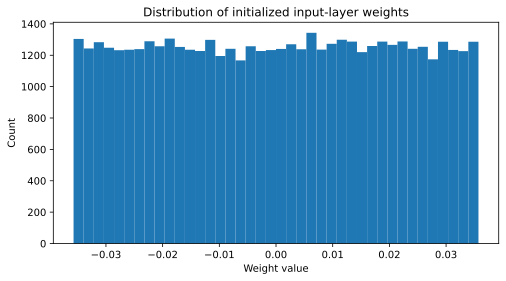

In [21]:
# finally, extract the weights and make a histogram
w = net.input.weight.detach().flatten()

plt.figure(figsize = (8,4) ,dpi = 140)
plt.hist(w,40)

plt.xlabel('Weight value')
plt.ylabel('Count')
plt.title('Distribution of initialized input-layer weights')
plt.show()

## 6. Custom Function for creating Histogram

In [47]:
# Function that returns a histogram of all weights (across all layers)

def weightsHistogram(net):

    # Initialize Empty weight vector
    W = np.array([])

    # Concatenate each layer of weights(weight and bias both)
    for layer in net.parameters():
        
        W = np.concatenate( (W,layer.detach().flatten().numpy() ) )

    # Compute their histogram (note: range is hard-coded)
    # histy : The values of the histogram. 
    # histx : The bin edges
    histy,histx = np.histogram(W, bins=np.linspace(-.8,.8,101),density=True)
    
    histx = (histx[1:]+histx[:-1])/2
    
    return histx,histy

#### test it!

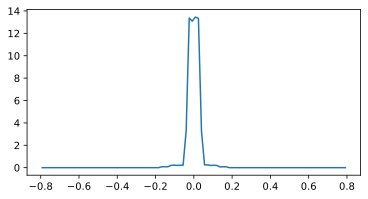

In [23]:
plt.figure(figsize = (6,3) ,dpi =130)
histx,histy = weightsHistogram(net)
plt.plot(histx,histy);

## 7. Model Training

In [24]:
def function2trainTheModel(Model , lossfunc , optimizer ,train_loader , test_loader , epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []
    
    # initialize histogram variables
    # 100 -> comes from  np.linspace(-.8,.8,101) : total 101 bin range will be created
    # and , total of 100 values of "histy" will be created for each epoch
    histx = np.zeros((epochs,100))
    histy = np.zeros((epochs,100))
    
    
    # loop over epochs
    for epochi in range(epochs):
        
        # get the weights distribution at the start of this epoch
        histx,histy[epochi,:] = weightsHistogram(net = Model)
        
        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model,histx,histy


## 6.  Run the model and plot the results

In [25]:
ANN_model,lossfunc,optimizer = createTheMNISTNet(LR = 0.01)

In [26]:
# 10 mins time it took 
TrainAcc,TestAcc,Losses,trained_Model,hixtx,histy = function2trainTheModel(Model = ANN_model , 
                                                               lossfunc = lossfunc , 
                                                               optimizer  = optimizer,
                                                               train_loader = train_loader , 
                                                               test_loader  =  test_loader, 
                                                               epochs = 50)

## 7. Results Visualization

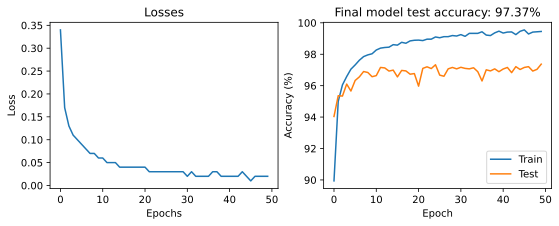

In [27]:
fig,ax = plt.subplots(1,2,figsize=(9,3))

ax[0].plot(Losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc,label='Train')
ax[1].plot(TestAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## Histogram Visualization

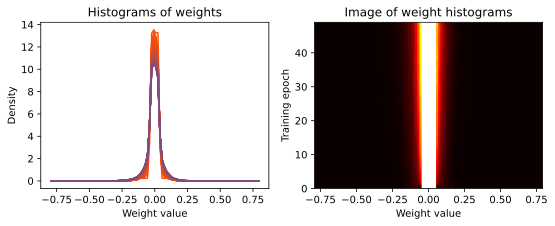

In [32]:
# show the histogram of the weights

fig,ax = plt.subplots(1,2,figsize=(9,3))

for i in range(histy.shape[0]):
    ax[0].plot(histx,histy[i,:],color=[1-i/100,.3,i/100])

ax[0].set_title('Histograms of weights')
ax[0].set_xlabel('Weight value')
ax[0].set_ylabel('Density')


ax[1].imshow(histy,vmin=0,vmax=3,
             extent=[histx[0],histx[-1],0,49],aspect='auto',origin='lower',cmap='hot')
ax[1].set_xlabel('Weight value')
ax[1].set_ylabel('Training epoch')
ax[1].set_title('Image of weight histograms')

plt.show()